<a href="https://colab.research.google.com/github/indracahyaramdani/PSDS/blob/main/Plotly_Modul_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisasi Data Dengan **PLOTLY** Dasar
Pusat Studi Data Sains (PSDS) Program Studi Matematika UAD

## Pendahuluan

## **DONT FORGET TO COPY IN DRIVE**

Ini adalah modul lanjutan kemarin, ada dua tipe plot tambahaan yang perlu temen-temen tahu. Yaitu network(graph) dan word cloud.

## Network/Graph

Mungkin ada beberapa temen-temen yang sudah mengetahuii teori tentang graph atau belum. Pada intinya graph itu untuk menggambarkan hubungan antara titik data menggunakan garis. Jika kedua titik ada hubungan maka dihubungkan, kalau tidak ya tidak. Lebih lengkapnya, baca artikel ini **WAJIB**: 

[Teori Graph, Sejarah dan Manfaatnya](https://https://mti.binus.ac.id/2018/03/05/teori-graph-sejarah-dan-manfaatnya/)


Nah, mari kita membuat graph kita sendiri. 



In [37]:
from operator import itemgetter
from networkx.algorithms import community
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Intinya graph itu terdiri dari dua hal penting yaitu nodes(titik) dan edges(garis hubung).

File excelnya di download dulu di GC terus diupload di sini ya. Kayak yang pandas kemarin loh.

In [28]:
#Mengakses Dataset
#Dataset titik
nodes_df=pd.read_excel('/content/migrasi_penduduk.xlsx', sheet_name='nodes')
nodes_df.head()

,id,lon,lat
0,Medan,98.6500,3.5800
1,Padang,100.3600,-0.9600
2,Riau,101.4250,0.5650
3,Jambi,103.6100,-1.5900
4,Tanjung Pinang,104.4714,0.9168


In [29]:
#Dataset edge
edges_df = pd.read_excel('/content/migrasi_penduduk.xlsx', sheet_name='edges')
edges_df.head()

,origin,destination,count
0,Jakarta,Bandung,296926
1,Semarang,Bandung,170126
2,Semarang,Jakarta,151648
3,Bandung,Jakarta,143760
4,Jakarta,Serang,125044


Pada kasus ini, kita akan membuat graph tentang laju migrasi penduduk di Indonesia saat pandemi. (Data Simulasi) Untuk membuat graphnya bisa menggunakan code berikut:



![alt text](https://drive.google.com/uc?id=1HdTkoLIk94NTtBtRL3GiPK8o1pAUshrj
)



In [33]:
#Ketikkan kode di sini
#menyiapkandata
node_names= list(nodes_df.id)
edges=edges_df[['origin','destination']]
edges.to_csv('edges_direction.csv')
edges=list(zip(edges_df.origin,edges_df.destination))
edge_value=edges_df['count']/100000
#membuatgraph
G=nx.DiGraph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))








Name: 
Type: DiGraph
Number of nodes: 21
Number of edges: 83
Average in degree:   3.9524
Average out degree:   3.9524


Nah pada akhir code di atas kita mendapat indformasi tentang graph yang sudah kita buat yaitu 21 titik(kota) dan 83 edge(jalur migrasi antar kota). Dua hal baris terakhir diabaikan dulu. Kita fokus untuk temen-temen bisa plot dulu aja. Bagi yang tertarik bisa memperdalam sendiri untuk bidang ini

Kemudian, kita akan melakukan vusialisasi graph. Tiap titik nanti akan diberi bobot atau ukuran didasarkan derajat centralitasnya. Apa itu? coba dicari di google hehehe. Tapi intinya derajat centralitas ini menggambarkan ke centralan titik pada graph, makin tinggi maka makin menggambarkan bahwa titik itu menjadi centarl pada suatu kelompok titik. Artinya titik ini bahkan bisa terhubung ke semua titik yang lainnya dan dia menjadi pusat dari kumpulan titik-titik itu.

Tuliskan kode berikut

![alt text](https://drive.google.com/uc?id=1W-60HJ23hxnc1_JFDw-Ex3PMHlxj3aUq
)

Kalo berhasil outputnya kek gini:
![alt text](https://drive.google.com/uc?id=1XiYZPSKz6FBsesKiwaIyBQv5gJ96AoNa
)





['Semarang', 'Bandung', 'Surabaya']

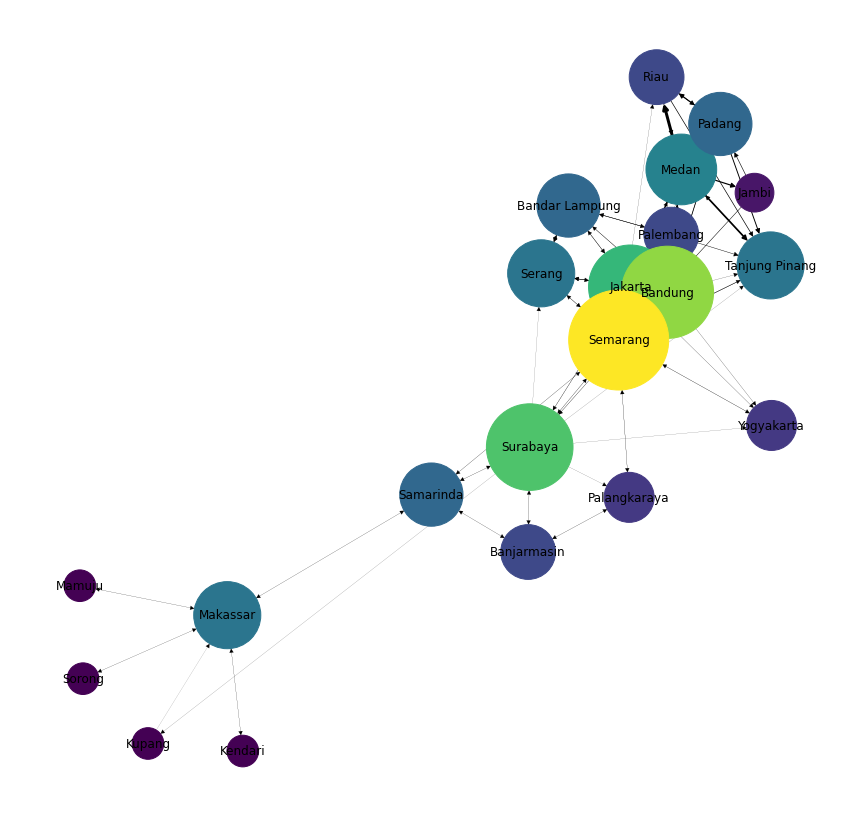

In [51]:
#Ketikkan kode di atas di sini
#Seting layout
pos=nx.spring_layout(G)
#Menghitung derajat sentralitas
degCent=nx.degree_centrality(G)
#Mewarnai titik
node_color=[20000.0 * G.degree(v) for v in G]
#Memberi ukuran pada titik
node_size=[v * 10000 for v in degCent.values()]
plt.figure(figsize=(15,15))
#Plot graph
nx.draw_networkx(G,pos=pos,with_labels=True,
                 node_color=node_color,
                 node_size=node_size,
                 width=edge_value)
plt.axis('off')
#Mengurutkan kota berdasarkan nilai derajat centralitasnya
sorted(degCent,key=degCent.get,reverse=True)[:3]


Dari hasil di atas dapat disimpulkan tiga kota prioritas lockdown karena menjadi central atas kota-kota disekitarnya adalah Semarang, Bandung dan Surabaya.

## Word Cloud

Kalo ini keren lagi, kita mau melakukan plot kata-kata gitu gaes. Jadi nanti kata-kata yang sering dibahas diplot lebih besar dan sebaliknya. Gituuu

In [42]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

Tuliskan kode berikut

![alt text](https://drive.google.com/uc?id=1U_w6c2Vs6D0YM8SwWquNCpEeXT9-GsOa
)


Kalo berhasil outputnya kek gini:





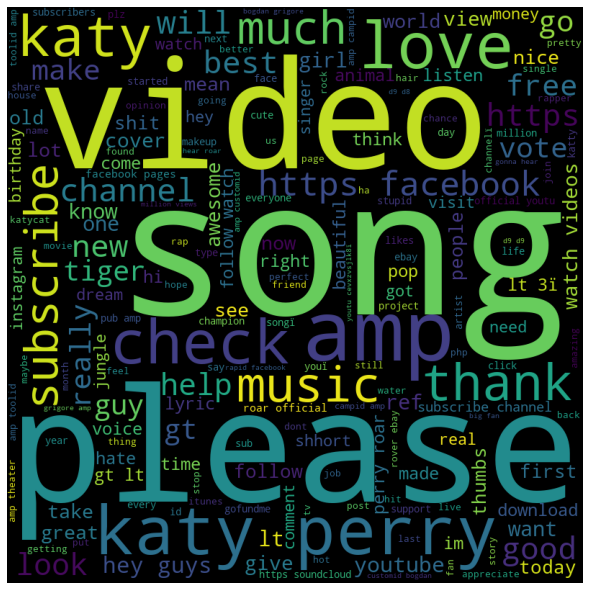

In [46]:
# Ketik kodenya di sini
df = pd.read_csv(r'/content/Youtube02-KatyPerry.csv', encoding='latin-1')
comment_words=''
stopwords=set(STOPWORDS)
#melakukan iterasi 
for val in df.CONTENT:
  val=str(val)
  tokens= val.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  comment_words+= " ".join(tokens)+" "
wordcloud = WordCloud(width=800, height=800,
                       background_color='black',
                       stopwords=stopwords,
                       min_font_size=10).generate(comment_words)
plt.figure(figsize=(8,8),facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

plt.show()
